In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

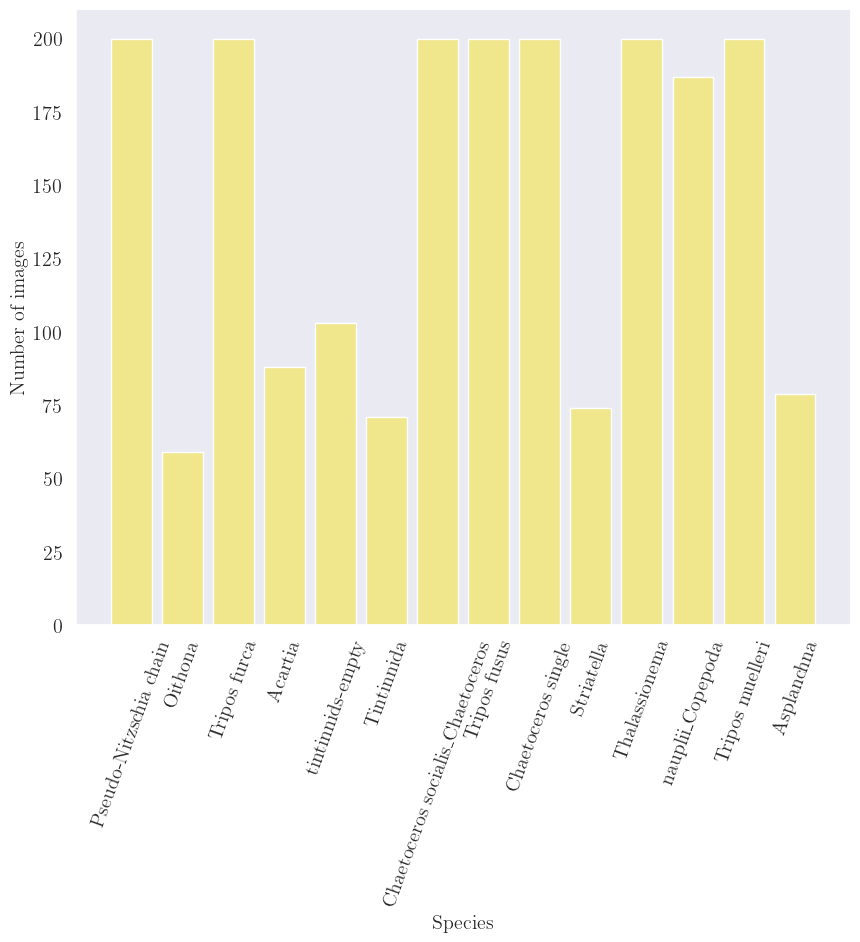

In [ ]:
#data = pd.read_csv("../data/features_padded_plancton")

import matplotlib.pyplot as plt
import seaborn as sns

def set_plt_params(remove_grid=False):
    """Set parameters and use seaborn theme to plot."""
    sns.set_theme()
    if remove_grid:
        sns.set_style("whitegrid", {"axes.grid": False})
    params = {
        "font.family": "Serif",
        "font.serif": "Roman", 
        "text.usetex": True,
        "axes.titlesize": "large",
        "axes.labelsize": "large",
        "xtick.labelsize": "large",
        "ytick.labelsize": "large",
        "legend.fontsize": "medium", 
        "savefig.dpi": 300, 
        "axes.grid" : False
    }
    plt.rcParams.update(params)
set_plt_params()


main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

amount = []
for specie in species: 
    no = len([image for image in os.listdir(main_dir+specie) if not image.startswith(".")])
    amount.append(no)
    
#amount
plt.figure(figsize=(10, 8))
plt.bar(species, amount, color = "khaki")
plt.xticks(rotation=70)
plt.ylabel("Number of images")
plt.xlabel("Species")
#plt.savefig("figs/label_distribution.pdf", bbox_inches = "tight")


In [44]:
indexs = species
df = pd.DataFrame(columns = ["feature_" + str(i) for i in range(384)], index=indexs)



In [45]:
main_dir = "../../data/features_padded_plancton/"
species = os.listdir(main_dir)

d_dict = {}

for specie in species: 
    imfls = [image for image in os.listdir(main_dir+specie) if not image.startswith(".")]
    for im in imfls:
        d_dict[(specie, im)] = np.loadtxt(main_dir+specie + "/" + im)

features = pd.DataFrame(d_dict).T
#features.to_csv('../../data/dinov2_features.csv')

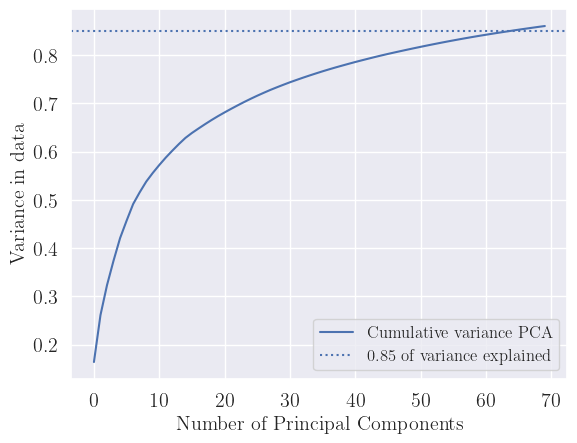

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 70)

pca.fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cumulative variance PCA")
plt.axhline(0.85, ls = ":", label = "0.85 of variance explained")
plt.grid(True)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance in data")
plt.legend()
#plt.savefig("figs/cumsum_pca.pdf", bbox_inches = "tight")
plt.show()

In [67]:
import umap
n = 70
standard = StandardScaler().fit_transform(features) 
pca_fit = pca.fit_transform(standard)

#umap
reducer = umap.UMAP(random_state=42) # fixed random state gives reproducibility
embedding = reducer.fit_transform(pca_fit) 

# putting all pca into pca df and umap df
pca_df = pd.DataFrame(pca_fit, index = features.index, columns = ["pca_"+str(i) for i in range(n)])
umap_df = pd.DataFrame(embedding, index = features.index, columns = ["embedding_0", "embedding_1"])

pca_df

/Users/ellen-beatetysvaer/opt/anaconda3/envs/pthree-dev/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


pca_0     pca_1     pca_2  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   12.223679 -3.609306  1.047031   
                       18_48_01_603240_0.txt   14.450506 -2.740759 -4.360431   
                       16_14_20_282179_0.txt   12.429804  0.061901 -0.020334   
                       12_47_38_412989_10.txt   9.590462 -1.539974  2.119135   
                       11_34_18_433102_1.txt    1.282143 -0.476244  0.385857   
...                                                  ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   -7.051107  1.405520  3.973013   
                       14_12_09_513048_2.txt   -4.750661  3.092971  3.855724   
                       23_02_55_885299_1.txt   -8.363859  1.980346  3.887527   
                       17_04_17_138640_1.txt   -3.361623 -1.803100  3.293156   
                       13_50_34_650304_0.txt   -5.092860  0.666015  3.600836   

                                                  pca_3     pca_4     pca_5  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.063283 -0.184629 -2.820789   
                       18_48_01_603240_0.txt  -0.653179 -3.584080 -7.312567   
                       16_14_20_282179_0.txt   1.302184 -0.247374 -0.402317   
                       12_47_38_412989_10.txt  1.053273  2.053151 -3.208101   
                       11_34_18_433102_1.txt  -4.978654  7.877699 -6.574207   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   3.903085 -2.438518 -1.038004   
                       14_12_09_513048_2.txt   9.497844 -2.451064 -5.024799   
                       23_02_55_885299_1.txt   3.251259 -0.539065  1.923407   
                       17_04_17_138640_1.txt   2.296941 -1.273597  3.033144   
                       13_50_34_650304_0.txt   7.858266 -2.241583 -2.764539   

                                                  pca_6     pca_7     pca_8  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.188229  2.947824 -1.793455   
                       18_48_01_603240_0.txt  -5.057805 -0.163783  1.077357   
                       16_14_20_282179_0.txt   1.418470  0.399416 -4.266489   
                       12_47_38_412989_10.txt -1.269123  4.316155 -2.071803   
                       11_34_18_433102_1.txt   1.433552  1.821137 -0.933676   
...                                                 ...       ...       ...   
Asplanchna             17_13_45_429581_1.txt   2.227236  0.799083  2.407147   
                       14_12_09_513048_2.txt  -1.872128  0.211149  6.187084   
                       23_02_55_885299_1.txt  -0.980112 -1.598429  2.118119   
                       17_04_17_138640_1.txt  -2.575185  1.307429  2.440476   
                       13_50_34_650304_0.txt   1.599358 -0.924838  7.632601   

                                                  pca_9  ...    pca_60  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt  -2.041064  ... -0.389530   
                       18_48_01_603240_0.txt  -0.697415  ...  1.575586   
                       16_14_20_282179_0.txt  -1.802505  ... -1.105452   
                       12_47_38_412989_10.txt -2.606529  ...  0.293444   
                       11_34_18_433102_1.txt  -0.116885  ... -0.234001   
...                                                 ...  ...       ...   
Asplanchna             17_13_45_429581_1.txt  -2.173763  ... -0.674497   
                       14_12_09_513048_2.txt   0.033062  ...  0.558159   
                       23_02_55_885299_1.txt  -2.171900  ...  0.705596   
                       17_04_17_138640_1.txt  -3.200101  ... -1.527888   
                       13_50_34_650304_0.txt   3.209353  ...  0.043332   

                                                 pca_61    pca_62    pca_63  \
Pseudo-Nitzschia chain 11_31_24_300112_1.txt   1.653089  1.333785 -0.804238   
                       18_48_01_603240_0.txt   0.926557 -0.832197 -0.330713   
                       16_14_20_282179_0.txt  -0.388876  0.969024 

In [68]:

pca_df = pca_df.reset_index()
map = {"level_0":"species", "level_1": "filename"}
pca_df = pca_df.rename(columns = {"level_0" : "species", "level_1" : "filename"})


pca_df

,species,filename,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,...,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69
0,Pseudo-Nitzschia chain,11_31_24_300112_1.txt,12.223679,-3.609306,1.047031,1.063283,-0.184629,-2.820789,1.188229,2.947824,...,-0.389530,1.653089,1.333785,-0.804238,0.898122,-1.961822,-0.727870,0.371054,-0.375003,-0.815864
1,Pseudo-Nitzschia chain,18_48_01_603240_0.txt,14.450506,-2.740759,-4.360431,-0.653179,-3.584080,-7.312567,-5.057805,-0.163783,...,1.575586,0.926557,-0.832197,-0.330713,0.105181,-0.019349,-0.593587,-2.006986,-0.086358,-0.634547
2,Pseudo-Nitzschia chain,16_14_20_282179_0.txt,12.429804,0.061901,-0.020334,1.302184,-0.247374,-0.402317,1.418470,0.399416,...,-1.105452,-0.388876,0.969024,0.072299,1.512066,-0.645434,-2.701769,-0.119709,-1.532149,0.102525
3,Pseudo-Nitzschia chain,12_47_38_412989_10.txt,9.590462,-1.539974,2.119135,1.053273,2.053151,-3.208101,-1.269123,4.316155,...,0.293444,0.923922,-0.754933,-0.636978,-0.313750,-1.688818,0.479324,0.038482,1.094283,-0.719253
4,Pseudo-Nitzschia chain,11_34_18_433102_1.txt,1.282143,-0.476244,0.385857,-4.978654,7.877699,-6.574207,1.433552,1.821137,...,-0.234001,-0.693427,0.291375,0.119499,0.229826,-0.376743,0.908870,0.537860,0.242991,0.804760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,Asplanchna,17_13_45_429581_1.txt,-7.051107,1.405520,3.973013,3.903085,-2.438518,-1.038004,2.227236,0.799083,...,-0.674497,-0.073334,-0.309183,-1.354747,0.309276,0.346087,-0.951045,0.381084,0.542115,1.454159
2057,Asplanchna,14_12_09_513048_2.txt,-4.750661,3.092971,3.855724,9.497844,-2.451064,-5.024799,-1.872128,0.211149,...,0.558159,-1.157538,-0.301447,0.266053,-0.200905,0.013772,1.622163,0.624615,-1.396936,-0.102492
2058,Asplanchna,23_02_55_885299_1.txt,-8.363859,1.980346,3.887527,3.251259,-0.539065,1.923407,-0.980112,-1.598429,...,0.705596,0.436182,-0.683976,1.802397,0.407170,0.869812,-0.999516,-0.077764,0.154271,0.523414
2059,Asplanchna,17_04_17_138640_1.txt,-3.361623,-1.803100,3.293156,2.296941,-1.273597,3.033144,-2.575185,1.307429,...,-1.527888,0.516866,0.522093,0.117404,0.656652,0.667611,0.475223,0.161961,0.248890,0.434642


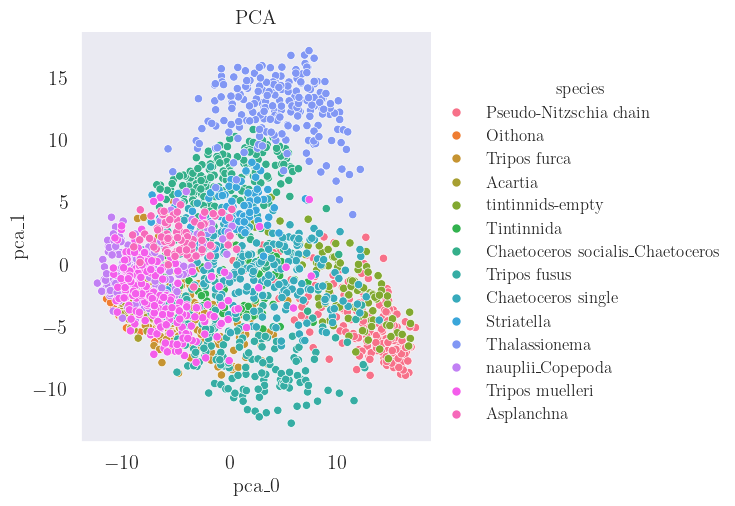

In [69]:
sns.relplot(x = "pca_0", y = "pca_1", 
            data = pca_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"PCA")
#plt.savefig("figs/pca0_pca1.pdf", bbox_inches = "tight")
plt.show()


In [70]:
umap_df = umap_df.reset_index()
umap_df.columns = ['species', 'file_name', 'embedding_0', 'embedding_1']

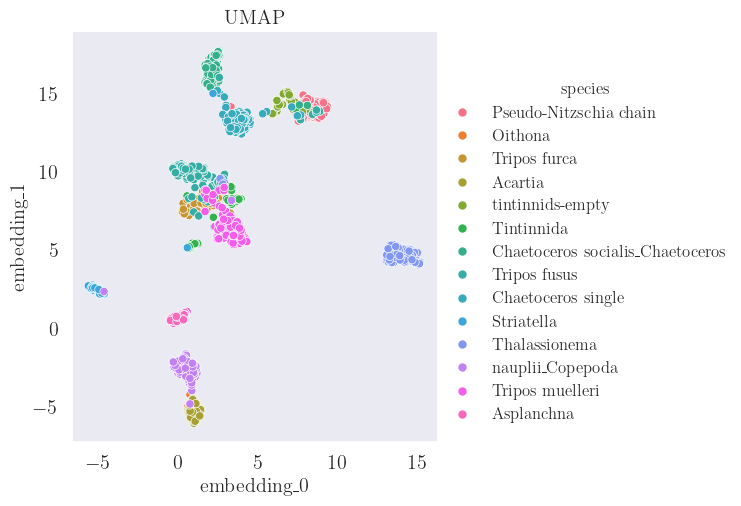

In [ ]:
sns.relplot(x = "embedding_0", y = "embedding_1", 
            data = umap_df, 
            kind = "scatter", 
            hue = "species"
            )
plt.title(f"UMAP")
plt.savefig("figs/umap_on_70pca.pdf", bbox_inches = "tight")
plt.show()